# Wellbeing et morts attribuables au changement climatique

Dans ce document, nous nous efforcerons d'établir une métrique pour estimer la quantité de Wellbeing perdue du fait des morts attribuables au changement climatique.


Nous nous baserons sur le papier de Pottier et al., qui exploite les chiffres de l'OMS de 2014. 

Pottier et al. fournit les années de vie perdues du fait du changement climatique, et ce par région, pour des périodes de 5 ans allant de 2015 à 2099, et ce selon deux scenari de forçage radiatif.

Voici les données qu'il fournit :


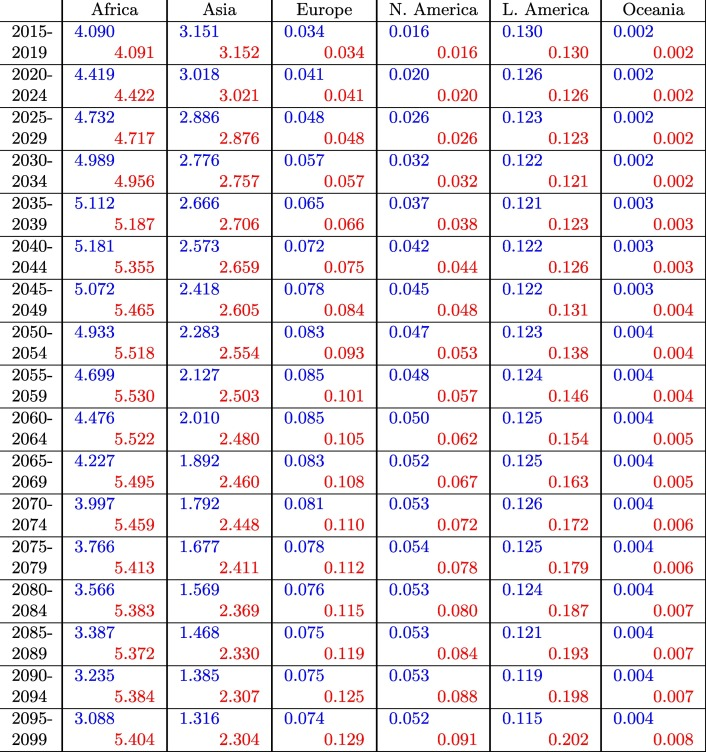

Ceci étant, il ne reste plus qu'à choisir un scenario et agréger ces données avec celles de wellbeing par région pour obtenir un impact global.

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

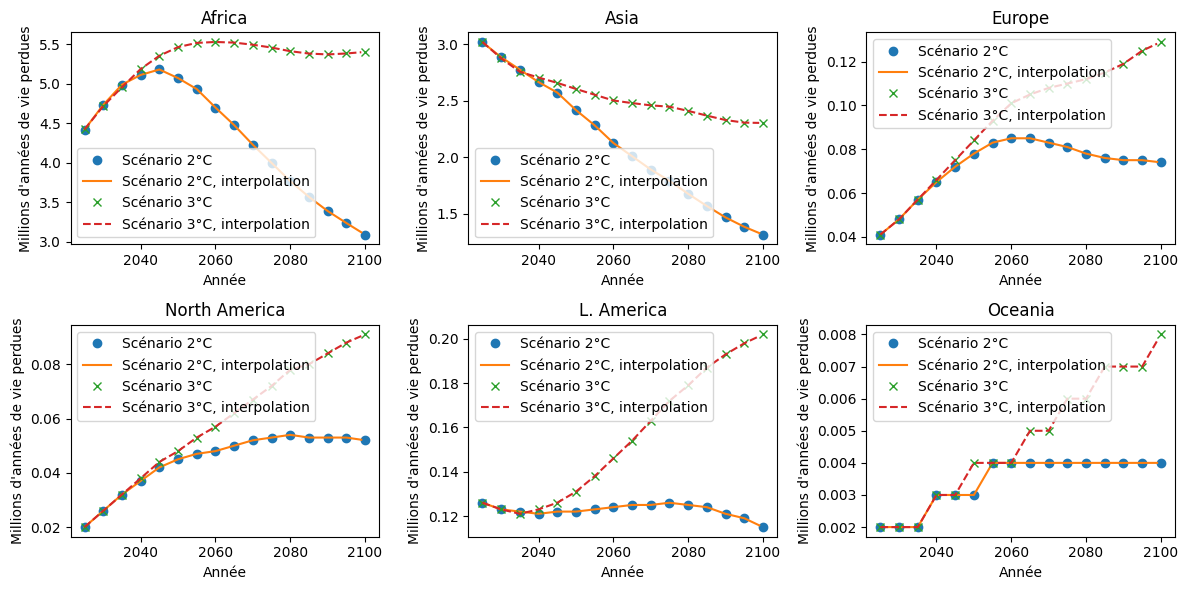

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


regions = ["Africa", "Asia", "Europe", "North America", "L. America", "Oceania"]

years_deaths = np.arange(2025, 2105, 5)

# Number of millions of years of life lost due tu global warming, in each region

deaths_2 = np.array([
    # [4.090, 3.151, 0.034, 0.016, 0.130, 0.002],  # 2015-2019
    [4.419, 3.018, 0.041, 0.020, 0.126, 0.002],  # 2020-2024
    [4.732, 2.886, 0.048, 0.026, 0.123, 0.002],  # 2025-2029
    [4.989, 2.776, 0.057, 0.032, 0.122, 0.002],  # 2030-2034
    [5.112, 2.666, 0.065, 0.037, 0.121, 0.003],  # 2035-2039
    [5.181, 2.573, 0.072, 0.042, 0.122, 0.003],  # 2040-2044
    [5.072, 2.418, 0.078, 0.045, 0.122, 0.003],  # 2045-2049
    [4.933, 2.283, 0.083, 0.047, 0.123, 0.004],  # 2050-2054
    [4.699, 2.127, 0.085, 0.048, 0.124, 0.004],  # 2055-2059
    [4.476, 2.010, 0.085, 0.050, 0.125, 0.004],  # 2060-2064
    [4.227, 1.892, 0.083, 0.052, 0.125, 0.004],  # 2065-2069
    [3.997, 1.792, 0.081, 0.053, 0.126, 0.004],  # 2070-2074
    [3.766, 1.677, 0.078, 0.054, 0.125, 0.004],  # 2075-2079
    [3.566, 1.569, 0.076, 0.053, 0.124, 0.004],  # 2080-2084
    [3.387, 1.468, 0.075, 0.053, 0.121, 0.004],  # 2085-2089
    [3.235, 1.385, 0.075, 0.053, 0.119, 0.004],  # 2090-2094
    [3.088, 1.316, 0.074, 0.052, 0.115, 0.004],  # 2095-2099
])

deaths_3 = np.array([
    # [4.091, 3.152, 0.034, 0.016, 0.130, 0.002],  # 2019
    [4.422, 3.021, 0.041, 0.020, 0.126, 0.002],  # 2024
    [4.717, 2.876, 0.048, 0.026, 0.123, 0.002],  # 2029
    [4.956, 2.757, 0.057, 0.032, 0.121, 0.002],  # 2034
    [5.187, 2.706, 0.066, 0.038, 0.123, 0.003],  # 2039
    [5.355, 2.659, 0.075, 0.044, 0.126, 0.003],  # 2044
    [5.465, 2.605, 0.084, 0.048, 0.131, 0.004],  # 2049
    [5.518, 2.554, 0.093, 0.053, 0.138, 0.004],  # 2054
    [5.530, 2.503, 0.101, 0.057, 0.146, 0.004],  # 2059
    [5.522, 2.480, 0.105, 0.062, 0.154, 0.005],  # 2064
    [5.495, 2.460, 0.108, 0.067, 0.163, 0.005],  # 2069
    [5.459, 2.448, 0.110, 0.072, 0.172, 0.006],  # 2074
    [5.413, 2.411, 0.112, 0.078, 0.179, 0.006],  # 2079
    [5.383, 2.369, 0.115, 0.080, 0.187, 0.007],  # 2084
    [5.372, 2.330, 0.119, 0.084, 0.193, 0.007],  # 2089
    [5.384, 2.307, 0.125, 0.088, 0.198, 0.007],  # 2094
    [5.404, 2.304, 0.129, 0.091, 0.202, 0.008],  # 2099
])


# Interpolation, in order to have yearly data

years_interp = np.arange(2025, 2100, 1)


deaths_2_interp = np.zeros((len(years_interp), deaths_2.shape[1]))
deaths_3_interp = np.zeros((len(years_interp), deaths_3.shape[1]))

for i in range(deaths_2.shape[1]):
    interp_func_2 = interp1d(years_deaths, deaths_2[:, i], kind='linear')
    deaths_2_interp[:, i] = interp_func_2(years_interp)

for i in range(deaths_3.shape[1]):
    interp_func_3 = interp1d(years_deaths, deaths_3[:, i], kind='linear')
    deaths_3_interp[:, i] = interp_func_3(years_interp)

    plt.figure(figsize=(12, 6))

# Plotting

for i, region in enumerate(["Africa", "Asia", "Europe", "North America", "L. America", "Oceania"]):
    plt.subplot(2, 3, i + 1)
    plt.plot(years_deaths, deaths_2[:, i], 'o', label='Scénario 2°C')
    plt.plot(years_interp, deaths_2_interp[:, i], '-', label='Scénario 2°C, interpolation')
    plt.plot(years_deaths, deaths_3[:, i], 'x', label='Scénario 3°C')
    plt.plot(years_interp, deaths_3_interp[:, i], '--', label='Scénario 3°C, interpolation')
    plt.title(region)
    plt.xlabel('Année')
    plt.ylabel("Millions d'années de vie perdues")
    plt.legend()

plt.tight_layout()
plt.show()


ici on ne fait qu'extraire les données du tableau, séparés selon le scenario choisi.

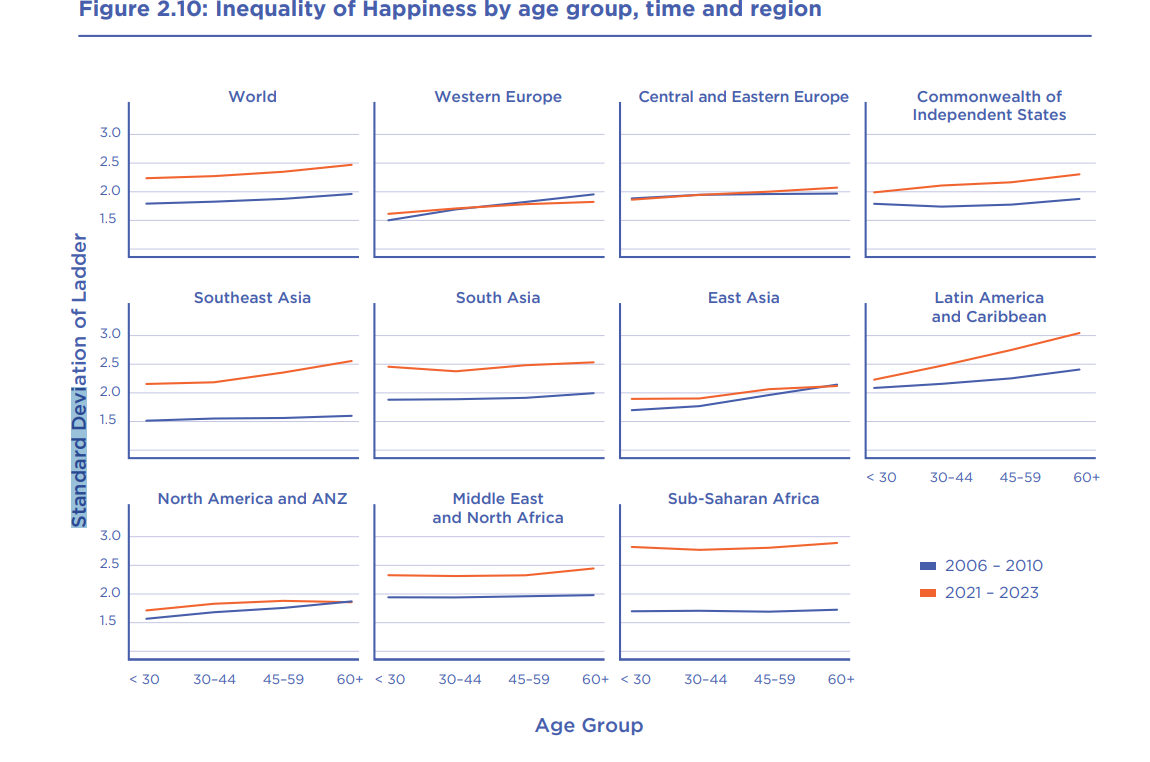

World Happiness Report 2024, p.44


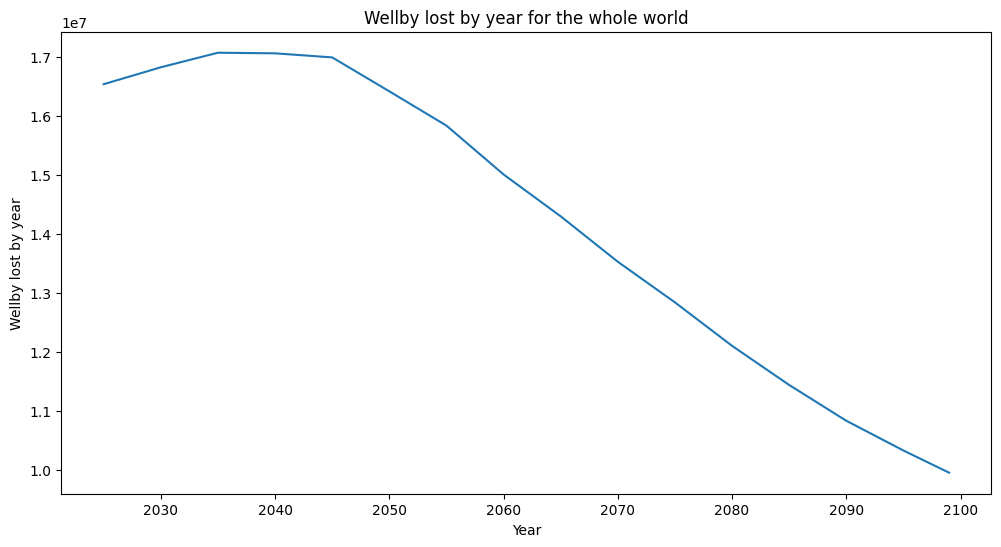

In [4]:
average_wb_by_region = np.array([4.5,6, 6, 7, 7, 6]) # Average well-being by region, measured with a Cantril ladder. This data is from the World Happiness Report 2024, but is very time-sensitive and it might be a source of error.

wby_std = 2.375 # Standard deviation of the world well-being index. This data is from the World Happiness Report 2024, but is very time-sensitive and it might be a source of error.

wellby_perdu = average_wb_by_region / wby_std  # The wellby is a variation of the well-being index by one standard deviation during a year. This list reprensents represents the wellby lost by one year of life lost for each region.

# We multiply the number of years of life lost by the wellby lost by year of life lost for each region, in order to have the wellby lost by year for each region.

for i in range (6):
    deaths_2_interp[:, i] = deaths_2_interp[:, i] * wellby_perdu[i]
    deaths_3_interp[:, i] = deaths_3_interp[:, i] * wellby_perdu[i]

# We then sum across the regions and multiply by 1,000,000 to have the wellby lost by year for the whole world.

wellby_lost_per_year_2 = np.sum(deaths_2_interp, axis=1)*1000000
wellby_lost_per_year_3 = np.sum(deaths_3_interp, axis=1)*1000000


plt.figure(figsize=(12, 6))
plt.plot(years_interp, wellby_lost_per_year_2, label='Scénario 2°C')
plt.xlabel('Year')
plt.ylabel('Wellby lost by year')
plt.title('Wellby lost by year for the whole world')
# We do not take into account the wellby lost by year before 2025, as it is not relevant for the study.

preceding_impacts = [0 for i in range(50)]

wellby_lost_per_year_2 = np.concatenate((preceding_impacts, wellby_lost_per_year_2))
wellby_lost_per_year_3 = np.concatenate((preceding_impacts, wellby_lost_per_year_3))

pour l'instant ces données sont extraites à la va-vite du dernier World Happiness Report

On peut alors calculer l'impact global en bien-être des morts dues au changement climatique, et ce selon 

On va construire un vecteur contenant les émissions de tCO2eq de l'humanité, depuis 1975 (année médiane de l'intervalle duquel on compare le climat pour faire notre étude contrefactuelle) jusqu'à 2023. L'arbitrage a été fait de prendre le CO2eq émis pour produire de l'énergie (source IEA (2023), GHG Emissions for energy).

Source alternative : Jones et al, 2024 [lien](https://www.nature.com/articles/s41597-023-02041-1)

In [5]:
import pandas as pd

# Opening the CSV file containing the emissions data
 
df = pd.read_csv('./total-ghg-emissions.csv') # The data is from the Our World in Data website, that tooko theirs from Jones et al. (2020) and the Global Carbon Project (2024).

df['Year'] = df['Year'].astype(int)


filtered_df = df[(df['Entity'] == 'World') & (df['Year'] >= 1975) & (df['Year'] <= 2019)]


# We only take the emissions data from 2020 to 2099, as it is the relevant data for the study.
 

GHG_75_23 = filtered_df['Annual greenhouse gas emissions in CO₂ equivalents'].tolist()
GHG_75_23 = [x / 10**6 for x in GHG_75_23] # We convert the emissions from tons to millions of tons.


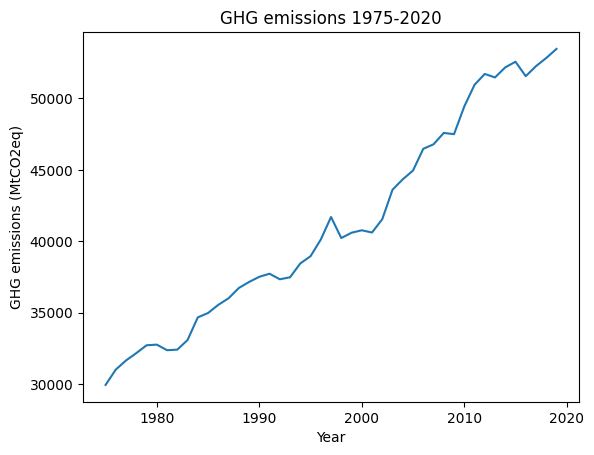

In [6]:
# GHG_75_23 = [17899,18898,19494,19997,20584,20289,19891,19733,19802,20452,20763,21139,21798,22531,22975,23362,23503,23378,23500,23590,24242,24754,25174,25333,25463,26281,26642,26957,28163,29451,30543,31453,32547,32791,32308,34224,35206,35592,36230,36326,36166,36206,36746,37629,37607] # MtCO2eq used for energy emitted by the world from 1975 to 2020. Data from the International Energy Agency.
years_1 = [i for i in range(1975, 2020)]

cumulative_emissions = np.cumsum(GHG_75_23) # Cumulative emissions from 1975 to 2020. This will be used to compute the partial impact of a given project, year by year

plt.plot(years_1, GHG_75_23)
plt.xlabel("Year")
plt.ylabel("GHG emissions (MtCO2eq)")
plt.title("GHG emissions 1975-2020")

plt.show()

Les sources concernant les émissions de CO2eq par l'humanité sont multiples, et diffèrent parfois d'un facteur 2. Il faudra être au clair sur les sources que nous choisissons et surtout être cohérent entre les données précédant 2020 et celles d'après.

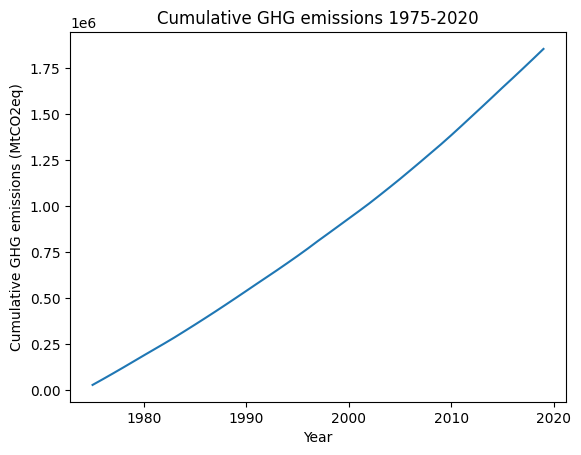

In [7]:
plt.plot(years_1, cumulative_emissions)
plt.xlabel("Year")
plt.ylabel("Cumulative GHG emissions (MtCO2eq)")
plt.title("Cumulative GHG emissions 1975-2020")
plt.show()

Concernant les émissions après 2025, on choisit le scénario SSP2 dit "middle of the road". Encore une fois, il s'agit d'un arbitrage qui, vraisemblablement, augmentera l'impact relatif du projet (en sous-estimant les émissions totales).

Les émissions de GES considérées aupravant prenaient en considération  le CO2, le CH4 ainsi que le N2O.

Les sources concernant les émissions de N2O sont difficilement trouvables, et sa contribution est un ordre de grandeur moins importante que le méthane.
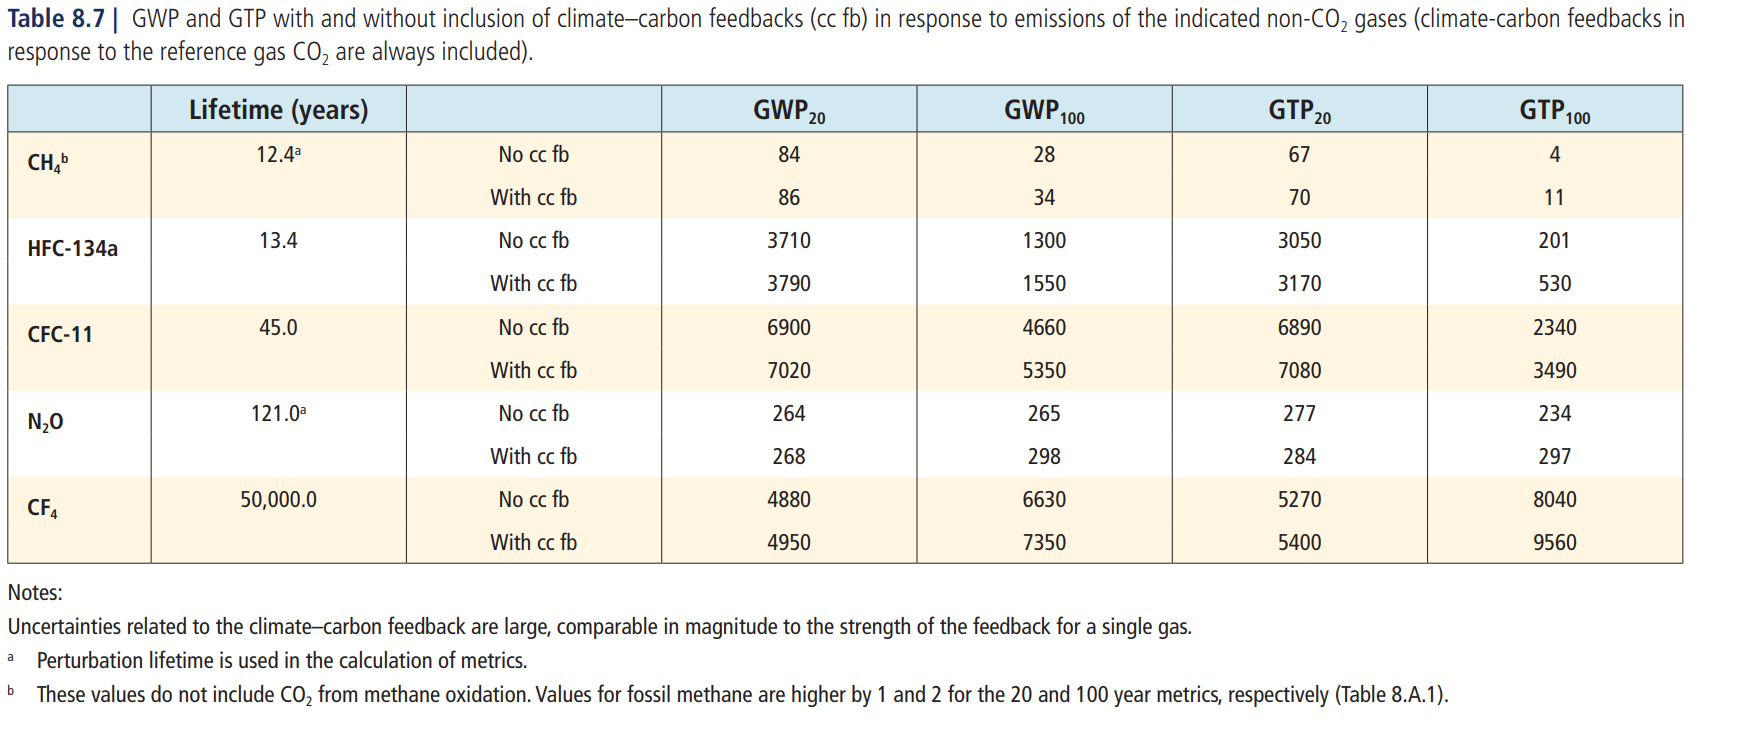

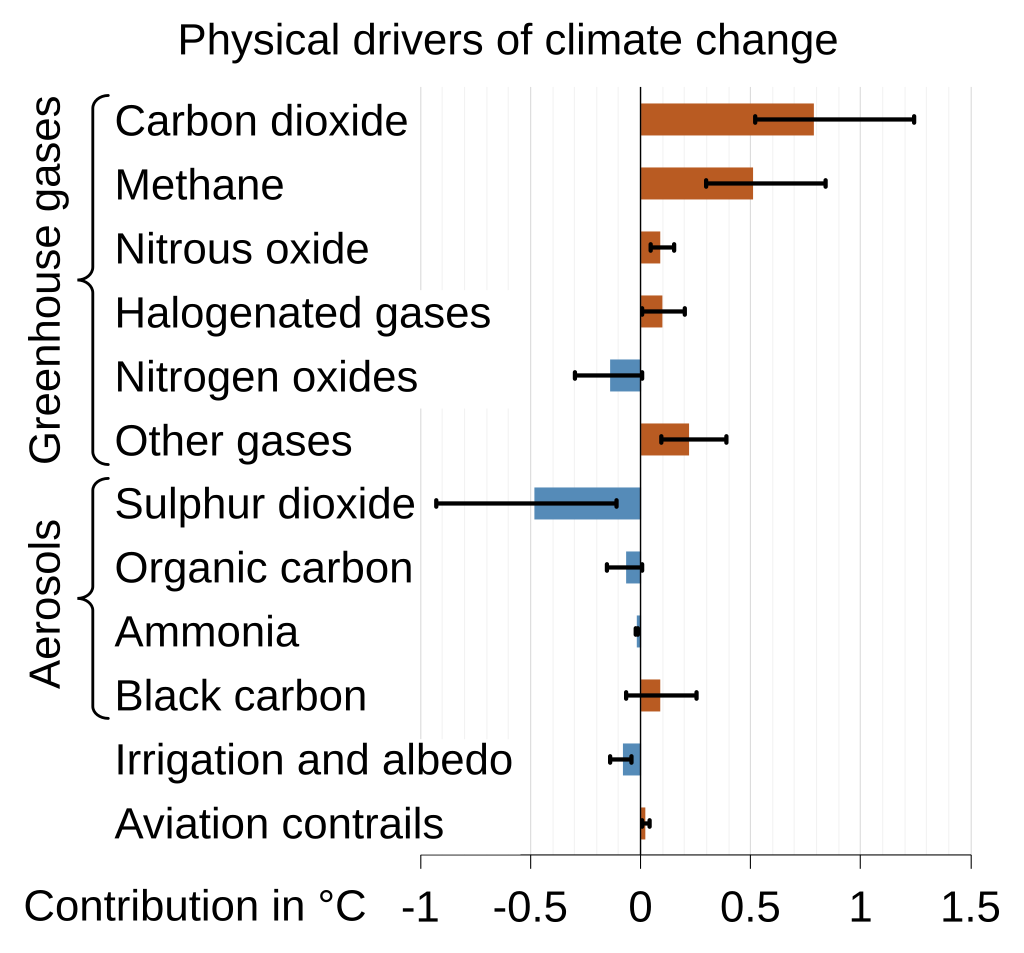
By Eric Fisk - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=81034563

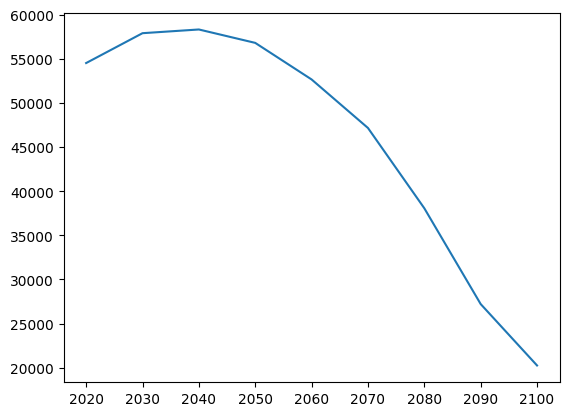

In [8]:

e_CO2 = [40647.530,	43476.063,	44252.900,	43462.190,	40196.485,	35235.434,	26838.373,	16324.392,	9682.859] # Yearly CO2 emissons from 2020 to 2100, in Mt. Data from the SSP public database, in the case of the SSP2 scenario. Each number represents the yearly CO2 emissions for a decade, as depicted in the following plot.
e_CH4 = [388.091,	399.446,	382.797,	357.167,	329.321,	316.639,	302.907,	298.816,	295.153] # Yearly CH4 emissons from 2020 to 2100, in Mt. Data from the SSP public database, in the case of the SSP2 scenario. Each number represents the yearly CH4 emissions for a decade, as depicted in the following plot.
e_N2O = [11322.853,	12208.751,	12623.767,	12586.939,	12218.569,	11545.719,	10362.636,	9524.760,	8732.334] # Yearly N2O emissons from 2020 to 2100, in kt. Data from the SSP public database, in the case of the SSP2 scenario. Each number represents the yearly N2O emissions for a decade, as depicted in the following plot.

GWP_100_CH4 = 28 # Global warming potential of CH4 over 100 years. Data from the IPCC.
GWP_100_N2O = 265 # Global warming potential of N2O over 100 years. Data from the IPCC.

e_N2O_corr = [x * GWP_100_N2O  / 10**3 for x in e_N2O] # We correct the N2O emissions by multiplying them by their global warming potential over 100 years.
e_CH4_corr = [x * GWP_100_CH4 for x in e_CH4] # We correct the CH4 emissions by multiplying them by their global warming potential over 100 years.
e = [sum(x) for x in zip(e_CO2, e_CH4_corr, e_N2O_corr)] # We sum the CO2, N2O and CH4 emissions to have the total GHG emissions for each year.
plt.plot([i for i in range(2020, 2110,10)], e)


On va procéder à une interpolation quadratique pour avoir des émissions année par année

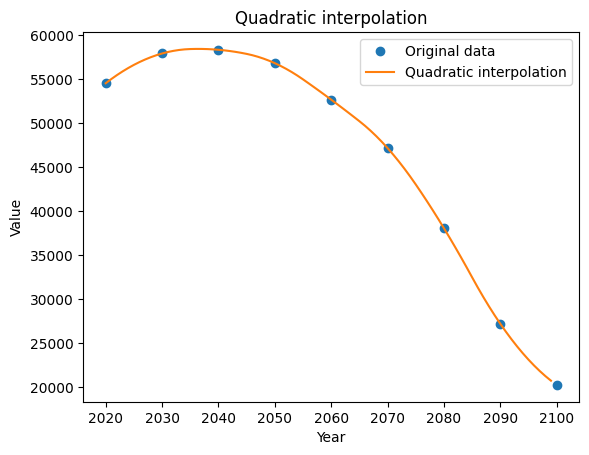

In [9]:
# Interpolation in ordrer to have yearly data

from scipy.interpolate import interp1d
years_2 = [i for i in range(2020, 2110, 10)]
interp_func = interp1d(years_2, e, kind='quadratic')

years_interp = np.arange(2020, 2100, 1) # We interpolate the data from 2020 to 2100
e_interp = interp_func(years_interp)
plt.plot(years_2, e, 'o', label='Original data')
plt.plot(years_interp, e_interp, '-', label='Quadratic interpolation')

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Quadratic interpolation')
plt.legend() #test reste à faire une dernière fois
plt.show()

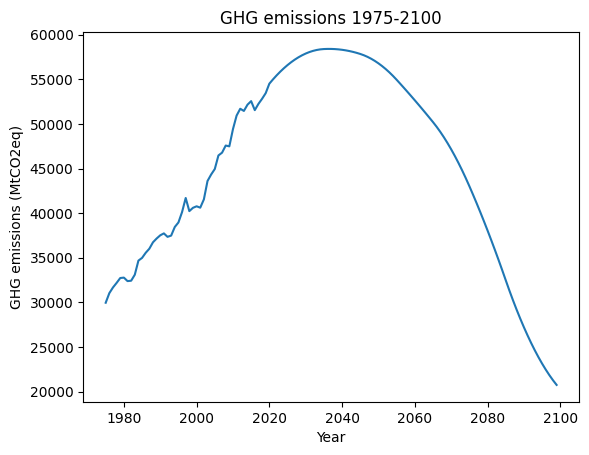

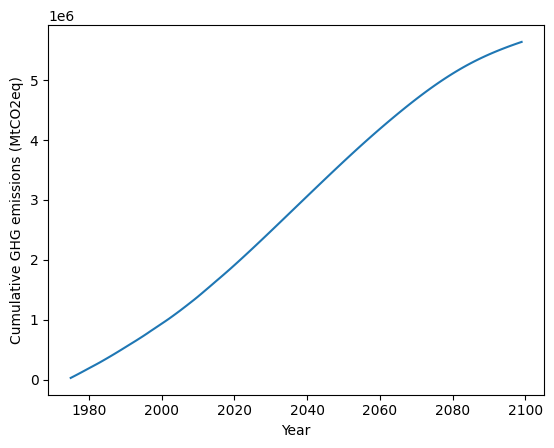

In [10]:
 # We concatenate the data from 1975 to 2020 with the interpolated data from 2020 to 2100, in order to have the whole data set.

years_tot = years_1 + years_interp.tolist()

e_tot = GHG_75_23 + e_interp.tolist()


plt.plot(years_tot, e_tot)
plt.xlabel('Year')
plt.ylabel('GHG emissions (MtCO2eq)')
plt.title('GHG emissions 1975-2100')
plt.show()
e_cumul = np.cumsum(e_tot)
plt.plot(years_tot, e_cumul)
plt.xlabel('Year')
plt.ylabel('Cumulative GHG emissions (MtCO2eq)')
plt.show()

In [ ]:
<a id="cumsume"></a>

Voilà donc nos émissions de dioxyde de carbone année par année. Remarques: les données présentent une discontinuité (un saut) en 2020, alors même qu'on passe des émissions de CO2eq à CO2 (pas trouvé de sources pour le CO2eq dans le futur, à voir si on préfère pas passser tout en CO2...)

On va pouvoir passer à notre fonction de calcul d'impact, après avoir pris en compte un discounting temporel, comme proposé par Layard.
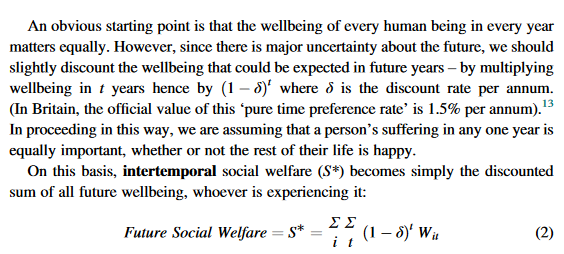

Wellbeing : Science and Policy, p.44. Layard et De Neve, 2023

In [11]:
delta = 0.01 # Annual discount rate. This is a very sensitive parameter, as it will determine the weight of the future impacts in the present. 
disc1 = [1 for x in range (45)]
disc2 = [(1-delta)**x for x in range (0,80)]
disc =  np.concatenate((disc1, disc2))
print(disc)
print(len(disc))


[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.99       0.9801
 0.970299   0.96059601 0.95099005 0.94148015 0.93206535 0.92274469
 0.91351725 0.90438208 0.89533825 0.88638487 0.87752102 0.86874581
 0.86005835 0.85145777 0.84294319 0.83451376 0.82616862 0.81790694
 0.80972787 0.80163059 0.79361428 0.78567814 0.77782136 0.77004315
 0.76234271 0.75471929 0.74717209 0.73970037 0.73230337 0.72498034
 0.71773053 0.71055323 0.70344769 0.69641322 0.68944909 0.6825546
 0.67572905 0.66897176 0.66228204 0.65565922 0.64910263 0.6426116
 0.63618549 0.62982363 0.62352539 0.61729014 0.61111724 0

In [12]:
def impact(emissions):

# This function takes the emissions in MtCO2eq due to the project year by year as an input

# It returns the wellby lost due to the project, until 2100

    # What counts is the total emissions due to the project until a given year, not the emissions of a given year. This is why we cumulate the emissions year by year.

    emissions = np.cumsum(emissions) 

    # We compute the partial impact of the project year by year, by dividing the emissions of the project by the total emissions of the world until that year.

    partial_impact_per_year = [e_projet / e_total_cumul for e_projet, e_total_cumul in zip(emissions, e_cumul)] 

    # We multiply the partial impact of the project by the wellby lost by year for the whole world, in order to have the wellby lost by year due to the project.

    wellby_impact_per_year = [wellby * impact * disc for impact, wellby, disc in zip(partial_impact_per_year, wellby_lost_per_year_3, disc)] 

    # We sum the wellby lost by year due to the project, in order to have the wellby lost due to the project until 2100. We also take into account the discount rate.

    return np.sum(wellby_impact_per_year)

# Example of use of the function

print(impact([1 for i in range (126)])) # This is the wellby lost due to a project emitting 1 MtCO2eq per year until 2100. The emissions are constant year by year.



18606.836744833676


problème des sources et de l'homogénéite du CO2 choisi, les périodes pré et post essayer de tendre vers un total de CO2eq

std du wellbeing

convertir en tCO2 (tCO2eq?)

scénario 2.6 et 6.0 arbitrage + bien comprendre 

discounting temporel

IPBES, Eau et autre ressources?

formule forcage radiatif et decay? avec 

projection co2 eq 1ère priorité, 1h et si rien j'arrête et sinon je continue 1h de plus? SRES A1B plutot que ssp? 
